In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
## class for linear regression same for simple and multiple

class LogisticRegression:
    def __init__(self,learning_rate, n_iterations):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations 
    
    # fit function is same as linear regression
    def fit(self,X,y):
        self.X = X
        self.y = y
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]

        # add one to each feature set to represent bias
        self.feature_matrix = np.hstack((np.ones((self.n_samples,1)), X))

        # intlize parameters
        self.parameters = np.zeros((self.n_features + 1,1))

        # for plotting gradient descent
        self.plot_grads = []

        for i in range(self.n_iterations):
            y_pred = self.predict(X)

            # calculate gradients wrt all parameters
            gradients = (1/self.n_features) * self.feature_matrix.T.dot(y_pred-y)
            self.parameters = self.parameters - self.learning_rate * gradients

            # gradient for first parameter
            self.plot_grads.append(gradients[1])
        return self.parameters

    ## only prediction functions are different from linear regression
    def predict(self, X):
        feature_vector = np.hstack((np.ones((X.shape[0],1)),X))
        lin_predictions = feature_vector.dot(self.parameters)
        predictions = self.sigmoid(lin_predictions)
        return predictions
    
    def predict_binary(self,X):
        prob_predictions = self.predict(X)
        return np.vectorize(lambda x: int(x>=0.5))(prob_predictions)
    
    def sigmoid(self, X):
        return 1/(1+np.exp(-X))

    def print_grad_plot(self):
        plt.scatter(np.arange(self.n_iterations), np.array(self.plot_grads))
        plt.xlabel('iterations')
        plt.ylabel('gradient for x1')
        plt.show()

In [93]:
# creating data frame from sklearn dataset
from sklearn import datasets

dataset = datasets.load_breast_cancer()

df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)

n_rows, n_cols = df.shape
print(n_rows)
print(n_cols)

df.head()

569
31


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [94]:
y = df['target'].to_numpy().reshape(n_rows,1)
print(y.shape)
print(y[:5,:])
X = df.to_numpy()[:,range(n_cols-1)]
print(X.shape)
print(X[:5,:])

(569, 1)
[[0]
 [0]
 [0]
 [0]
 [0]]
(569, 30)
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 

[[ 1.88818889e-03]
 [ 1.33028319e-02]
 [ 7.84105007e-03]
 [ 6.99355583e-02]
 [ 1.62789700e-02]
 [ 8.77499971e-05]
 [-2.62642944e-04]
 [-5.25631957e-04]
 [-2.13376940e-04]
 [ 1.75096614e-04]
 [ 8.43883298e-05]
 [ 1.17537437e-04]
 [ 7.40063324e-04]
 [-8.63898665e-04]
 [-2.31092334e-02]
 [ 3.02909660e-06]
 [-7.37198690e-05]
 [-1.00391196e-04]
 [-2.16536913e-05]
 [ 8.69989718e-06]
 [-3.58269455e-06]
 [ 1.39484049e-02]
 [ 5.48867077e-03]
 [ 6.27980010e-02]
 [-2.85037232e-02]
 [ 8.23140246e-05]
 [-1.00305887e-03]
 [-1.42475868e-03]
 [-3.64899669e-04]
 [ 1.18276536e-04]
 [ 1.68410282e-05]]


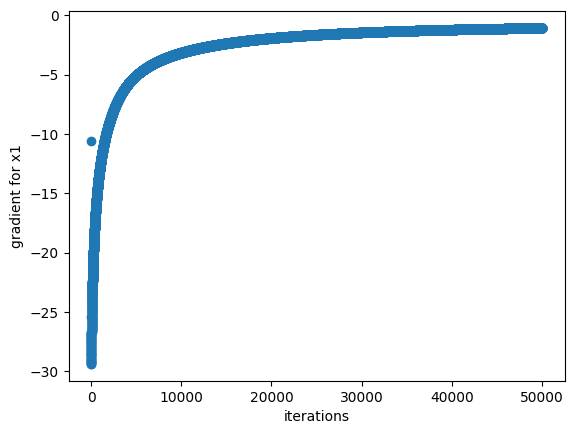

[[4.36445083e-11]
 [1.48372057e-07]
 [7.97578249e-06]
 [8.54690668e-01]
 [2.08554317e-03]]
[[0]
 [0]
 [0]
 [1]
 [0]]


In [101]:
linear_reg = LogisticRegression(0.0000001, 50000)
params = linear_reg.fit(X,y)
print(params)
linear_reg.print_grad_plot()

y_pred_prob = linear_reg.predict(X)
y_pred_binary = linear_reg.predict_binary(X)
print(y_pred_prob[:5,:])
print(y_pred_binary[:5,:])


In [102]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y, np.vectorize(lambda x: int(x>=0.5))(y_pred) )
print(cnf_matrix)
n_correct = cnf_matrix[0,0]+cnf_matrix[1,1]
n_false = cnf_matrix[0,1]+cnf_matrix[1,0]
print("accuracy: ", (n_correct)*100/(n_correct + n_false))

[[197  15]
 [  9 348]]
accuracy:  95.78207381370827


In [103]:
# using skitlearn
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X,y.reshape(n_rows))
print(log_reg.intercept_, log_reg.coef_)
y_pred = log_reg.predict(X)
print(y_pred[:5])

[28.64060591] [[ 0.97855146  0.18446388 -0.27220034  0.02276362 -0.18111069 -0.21487334
  -0.53468564 -0.29779157 -0.2681173  -0.03022007 -0.07909699  1.23965431
   0.14345379 -0.11060121 -0.02608428  0.07255753 -0.03194503 -0.03844704
  -0.03495983  0.01488637  0.10166909 -0.43913919 -0.10872099 -0.01306281
  -0.36422599 -0.6814999  -1.43201036 -0.61081381 -0.73052386 -0.09456843]]
[0 0 0 0 0]


In [104]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y, y_pred )
print(cnf_matrix)
n_correct = cnf_matrix[0,0]+cnf_matrix[1,1]
n_false = cnf_matrix[0,1]+cnf_matrix[1,0]
print("accuracy: ", (n_correct)*100/(n_correct + n_false))

[[197  15]
 [  9 348]]
accuracy:  95.78207381370827
